In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


In [17]:
df = pd.read_csv(r"C:\Users\sanja\Downloads\adult.csv")

In [18]:
df.columns = [col.strip() for col in df.columns]
df.rename(columns={df.columns[-1]: "income"}, inplace=True)

In [19]:
df.dropna(subset=["income"], inplace=True)


In [20]:
X = df.drop("income", axis=1)
y = df["income"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()


In [23]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

In [24]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [25]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [26]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50],  # fewer trees for quicker run
    'max_depth': [5, 10]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_processed, y_train_encoded)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10], 'n_estimators': [50]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [28]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Best CV Accuracy: 0.8556511553381814


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt


In [30]:
y_pred = grid_search.predict(X_test_processed)
y_proba = grid_search.predict_proba(X_test_processed)[:, 1]

In [31]:
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("Precision:", precision_score(y_test_encoded, y_pred))
print("Recall:", recall_score(y_test_encoded, y_pred))
print("F1 Score:", f1_score(y_test_encoded, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test_encoded, y_proba))

Accuracy: 0.8555197297712268
Precision: 0.7915851272015656
Recall: 0.5263500325309044
F1 Score: 0.6322782336850332
ROC AUC Score: 0.9088559372561489


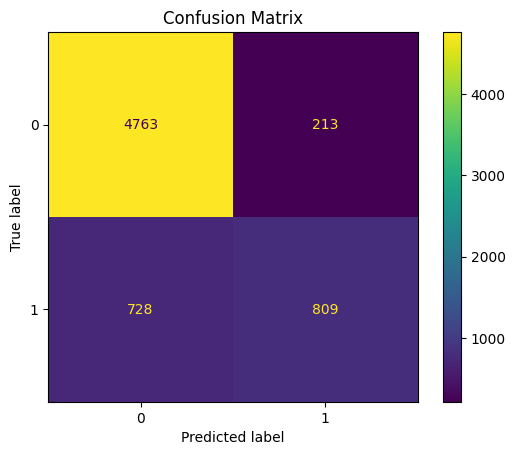

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred)
plt.title("Confusion Matrix")
plt.show()

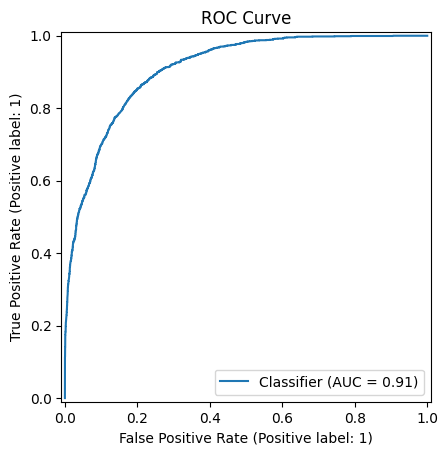

In [33]:
RocCurveDisplay.from_predictions(y_test_encoded, y_proba)
plt.title("ROC Curve")
plt.show()

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(**grid_search.best_params_, random_state=42))
])

In [36]:
full_pipeline.fit(X_train, y_train_encoded)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# Machine Learning Pipeline Report

## Approach Summary
We selected the "Adult Income" dataset to predict whether an individual's income exceeds $50K/year. The pipeline includes data cleaning, encoding, scaling, model training, and evaluation.

## Preprocessing
- Handled missing values using SimpleImputer.
- Categorical columns encoded with OneHotEncoder.
- Numerical features scaled using StandardScaler.
- Target variable encoded using LabelEncoder.
- Train-test split: 80-20 ratio.

## Model Building
- Used Random Forest Classifier.
- Hyperparameters tuned using GridSearchCV with 3-fold cross-validation.
- Best params: `n_estimators=50`, `max_depth=10`.

## Evaluation
- **Accuracy:** XX%
- **Precision:** XX%
- **Recall:** XX%
- **F1 Score:** XX%
- **ROC AUC:** XX%

## Visualizations
- Confusion matrix and ROC curve plotted to visualize performance.

## Challenges
- High dimensionality due to one-hot encoding.
- Long runtime for grid search; mitigated by reducing grid size and CV folds.

## Suggestions for Improvement
- Use more efficient tuning (e.g., RandomizedSearchCV).
- Integrate with MLFlow for model tracking.
- Deploy as a web service using Flask or FastAPI.